# Clothing E-Commerce Analytics

## Table of contents<a type=anchor name='cat'>

[1. Introduction](#intro)
- [Goals of the analysis](#1-1)
- [Data description](#1-2)

[2. Data Loading and Understanding](#import)
- [Packages loading](#2-1)
- [Data loading](#2-2)
- [Data understanding](#2-3)

[3. Exploratory Data Analysis](#exploration)
- [Class name distribution](#3-1)
- [Rating distribution](#3-2)
- [Five-star rating table by class name](#3-3)
- [Conclusion of exploratory data analysis](#3-con)

[4. Customer Analysis](#customer)
- [Age distribution in five year intervals](#4-1)
- [Distribution and cumulative percentage of age](#4-2)
- [Age distribution by division name](#4-3)
- [Conclusion of customer analysis](#4-con)

[5. Product Analysis](#product)
- [Clothing items with 300 or more sales](#5-1)
- [Clothing items with 150 or more 5-star rating count](#5-2)
- [Five-star rating percentage of clothing items with 500 or more sales](#5-3)
- [Conclusion of product analysis](#5-con)

[6. Reviewing Text Analysis](#text)
- [Text data preprocessing](#6-1)
- [Frequent words in five-star rating](#6-2)
- [Frequent words in one-star rating](#6-3)
- [Sentiment analysis](#6-4)
- [Conclusion of reviewing text reviewing](#6-con)

[7. Prediction Model of Recommendation](#model)
- [Seperate and split the data](#7-1)
- [Prediction model building](#7-2)
- [Implementing SMOTE for oversampling](#7-3)
- [Implementing Random Under-Sampling](#7-4)
- [Conclusion of prediction model of recommendation](#7-con)

## 1. Introduction<a type=anchor name='intro'>
    
[Go to top](#cat)

### Goals of the analysis<a type=anchor name='1-1'>
    
[Go to top](#cat)

In this project, we aim to conduct a comprehensive analysis of e-commerce sales and customer behavior, focusing on the following key areas:

**1. Product Performance and Ratings:**

- **Objective:** Identify the product categories that exhibit the highest sales performance.
- **Key Metric:** Analyze the percentage of 5-star ratings these top-performing products receive to assess customer satisfaction.

**2. Customer Age and Sales Relationship:**

- **Objective:** Examine the correlation between sales and the age demographics of customers.
- **Insights:** Determine which types of products are more popular among different age groups and how age influences purchasing behavior.


**3. Top-Selling Products and Ratings:**

- **Objective:** Identify the top-selling products across the platform.
- **Analysis:** Evaluate the 5-star rating percentage for these products to understand their quality perception among customers.


**4. Review Text Analysis and Sentiment:**

- **Objective:** Perform text analysis on customer reviews to identify frequently used words and phrases.
- **Sentiment Analysis:** Explore the relationship between sentiment scores and customer age groups, gaining insights into how different demographics perceive products.


**5. Recommendation Prediction Model:**

- **Objective:** Develop a machine learning model to predict whether customers will recommend the products they purchase.
- **Outcome:** This model will provide actionable insights to improve customer recommendation rates and enhance overall customer satisfaction.

### Data description<a type=anchor name='1-2'>
    
[Go to top](#cat)

This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

- __Clothing ID__: Integer Categorical variable that refers to the specific piece being reviewed.
- __Age__: Positive Integer variable of the reviewers age.
- __Title__: String variable for the title of the review.
- __Review Text__: String variable for the review body.
- __Rating__: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
- __Recommended IND__: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
- __Positive Feedback Count__: Positive Integer documenting the number of other customers who found this review positive.
- __Division Name__: Categorical name of the product high level division.
- __Department Name__: Categorical name of the product department name.
- __Class Name__: Categorical name of the product class name.

## 2. Data Loading and Understanding<a type=anchor name='import'>
    
[Go to top](#cat)

### Packages loading<a type=anchor name='2-1'>
    
[Go to top](#cat)

In [39]:
import re
import nltk
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from xgboost import XGBClassifier
from nltk.stem import WordNetLemmatizer
from imblearn.over_sampling import SMOTE
from wordcloud import WordCloud, STOPWORDS
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from nltk import pos_tag, word_tokenize, FreqDist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

### Data loading<a type=anchor name='2-2'>
    
[Go to top](#cat)

In [6]:
path = "/Users/homerliu/Desktop/coding/Womens Clothing E-Commerce Reviews/Womens Clothing E-Commerce Reviews.csv"
df = pd.read_csv(path)

### Data understanding<a type=anchor name='2-3'>
    
[Go to top](#cat)

In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [8]:
print('Null Value Count by Columns:')
print(df.isnull().sum())
df.head()

Null Value Count by Columns:
Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


## 3. Exploratory Data Analysis<a type=anchor name='exploration'>
    
[Got o top](#cat)

- Class name distribution
- Rating distribution
- Five-star rating table by class name
- Conclusion of exploratory data analysis

### Class name distribution<a type=anchor name='3-1'>
    
[Go to top](#cat)

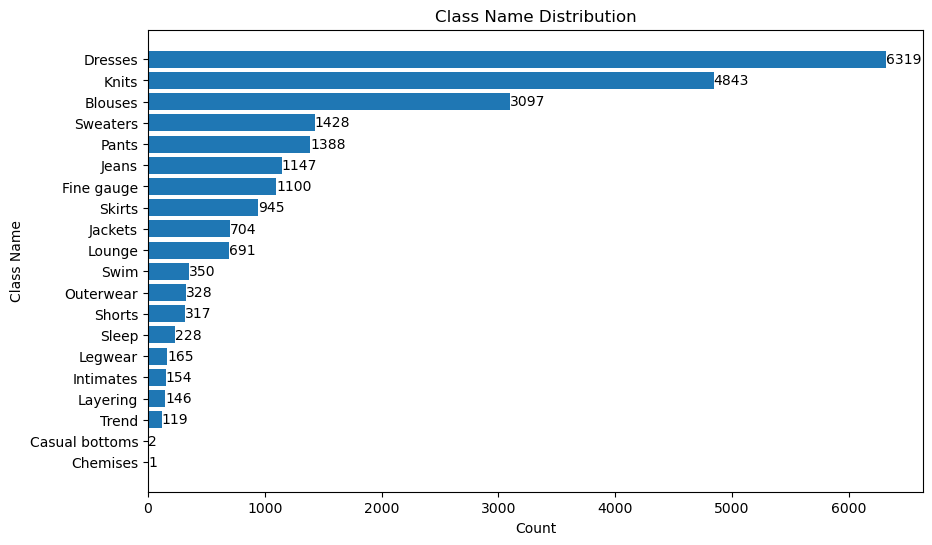

In [9]:
# Calculate the distribution of Class Name and sort by count in descending order
class_counts = df['Class Name'].value_counts().sort_values(ascending=False)

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(class_counts.index, class_counts, color='#1f77b4')

# Add precise numbers on top of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2.0, f'{int(width)}', ha='left', va='center')

# Set the chart title and labels
plt.title('Class Name Distribution')
plt.xlabel('Count')
plt.ylabel('Class Name')

# Invert the y-axis to display from top to bottom
plt.gca().invert_yaxis()

# Show the plot
plt.show()

### Rating distribution<a type=anchor name='3-2'>
    
[Go to top](#cat)

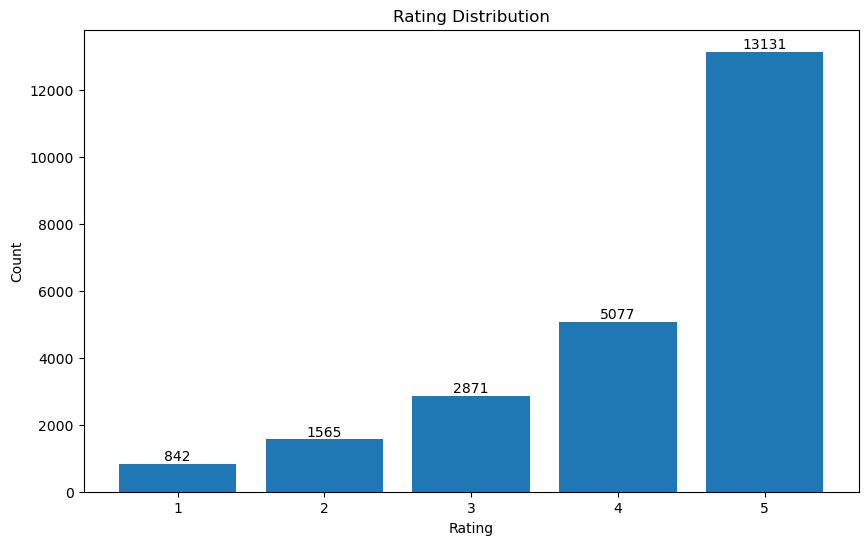

In [10]:
# Calculate the distribution of ratings
rating_counts = df['Rating'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(rating_counts.index, rating_counts, color='#1f77b4')

# Add precise numbers on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom')

plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Show plot
plt.show()

### Rating table by class name<a type=anchor name='3-3'>
    
[Go to top](#cat)

In [12]:
# Count unique value in 'Class Name' column
class_counts = df['Class Name'].value_counts().reset_index()
class_counts.columns = ['Class Name', 'Count']

# Count value if rating = 5  
rating_5_counts = df[df['Rating'] == 5]['Class Name'].value_counts().reset_index()
rating_5_counts.columns = ['Class Name', '5 Rating Count']

# Count value if rating = 1  
rating_1_counts = df[df['Rating'] == 1]['Class Name'].value_counts().reset_index()
rating_1_counts.columns = ['Class Name', '1 Rating Count']

# Merge dataframes
merged_df = pd.merge(class_counts, rating_5_counts, on='Class Name', how='left')
merged_df = pd.merge(merged_df, rating_1_counts, on='Class Name', how='left')

# Calculate percentage of rating
merged_df['5 Rating Percentage'] = round(merged_df['5 Rating Count'] / merged_df['Count']*100, 2)
merged_df['1 Rating Percentage'] = round(merged_df['1 Rating Count'] / merged_df['Count']*100, 2)

# Show result
merged_df

,Class Name,Count,5 Rating Count,1 Rating Count,5 Rating Percentage,1 Rating Percentage
0,Dresses,6319,3397.0,228.0,53.76,3.61
1,Knits,4843,2589.0,178.0,53.46,3.68
2,Blouses,3097,1686.0,119.0,54.44,3.84
3,Sweaters,1428,810.0,49.0,56.72,3.43
4,Pants,1388,816.0,42.0,58.79,3.03
5,Jeans,1147,729.0,30.0,63.56,2.62
6,Fine gauge,1100,646.0,30.0,58.73,2.73
7,Skirts,945,544.0,34.0,57.57,3.60
8,Jackets,704,451.0,35.0,64.06,4.97
9,Lounge,691,405.0,23.0,58.61,3.33


### Conclusion of exploratory data analysis:<a type=anchor name='3-con'>

[Go to top](#cat)

In class name distribution: **Dresses, knits, and blouses are the primary products, accounting for 61% of total sales.** Individually, these products contribute 27%, 21%, and 13% of all sales, respectively.

In rating distribution: There are 13,131 customers rating products as 5-star rating, which is **56%** of total rating.

In the ratings table by class name, dresses, knits, and blouses maintain approximately a 54% five-star rating and a 3.7% one-star rating, indicating consistent performance. However, **products in the Jeans category have a higher percentage of five-star ratings and a lower percentage of one-star ratings** compared to these primary products.

## 4. Customer Analysis<a type=anchor name='customer'>
    
[Go to top](#cat)
    
- Age distribution in five-year intervals
- Distribution and cumulative percentage of age
- Age distribution by class name
- Conclusion of customers analysis

### Age distribution in five year intervals<a type=anchor name='4-1'>
    
[Go to top](#cat)

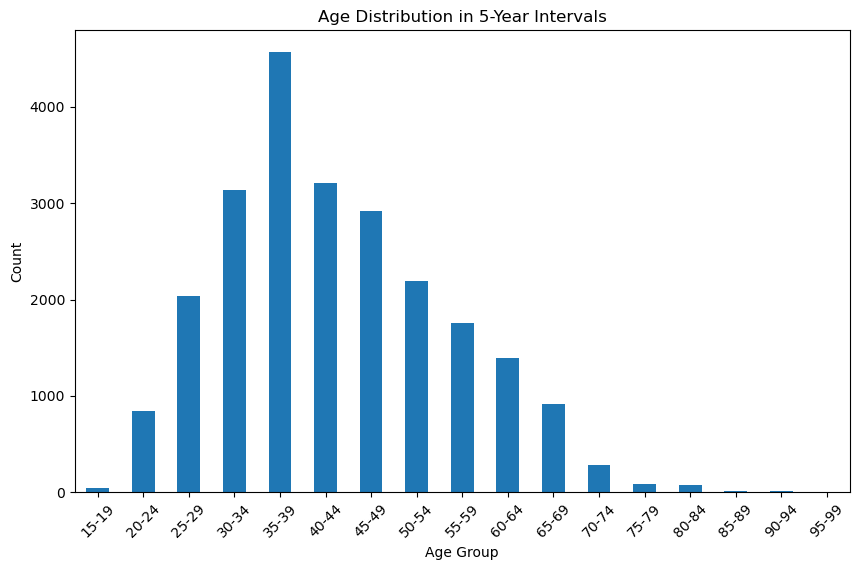

In [13]:
age_df = df

# Create age intervals
bins = range(15, age_df['Age'].max() + 5, 5)
labels = [f'{i}-{i+4}' for i in bins[:-1]]

# Group ages into intervals
age_df['Age Group'] = pd.cut(age_df['Age'], bins=bins, labels=labels, right=False)

# Count the number of occurrences in each age interval
age_distribution = age_df['Age Group'].value_counts().sort_index()

# Plot a bar chart
plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar')
plt.title('Age Distribution in 5-Year Intervals')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Show plot
plt.show()

### Distribution and cumulative percentage of age<a type=anchor name='4-2'>
    
[Go to top](#cat)

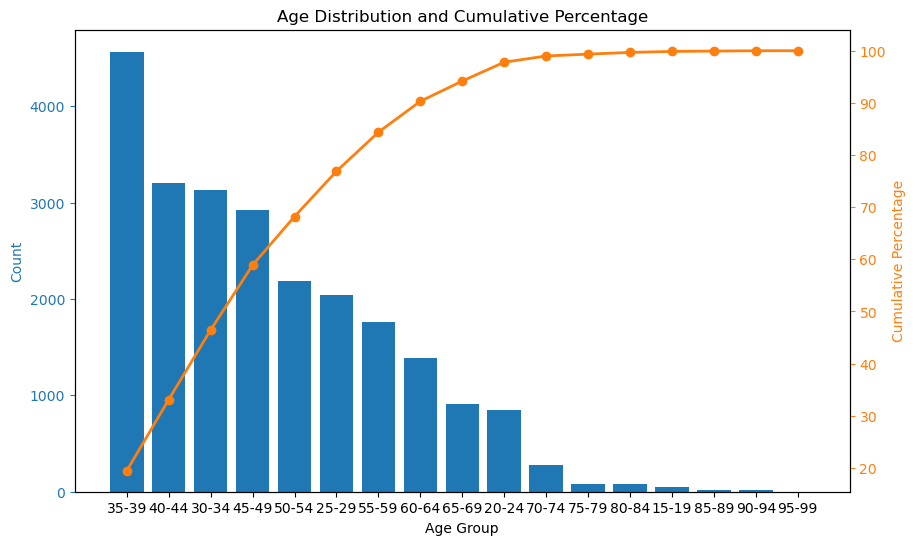

In [14]:
# Count the number of occurrences in each age interval
age_distribution = age_df['Age Group'].value_counts().sort_values(ascending=False)

# Calculate cumulative percentage
cumulative_percentage = age_distribution.cumsum() / age_distribution.sum() * 100

# Plot a bar chart for the age distribution
fig, ax1 = plt.subplots(figsize=(10, 6))

# Adjust colors
bar_color = '#1f77b4'  # deep blue
line_color = '#ff7f0e'  # orange

ax1.bar(age_distribution.index, age_distribution, color=bar_color)
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Count', color=bar_color)
ax1.tick_params('y', colors=bar_color)
ax1.set_title('Age Distribution and Cumulative Percentage')

# Plot a line chart for the cumulative percentage
ax2 = ax1.twinx()
ax2.plot(age_distribution.index, cumulative_percentage, color=line_color, marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('Cumulative Percentage', color=line_color)
ax2.tick_params('y', colors=line_color)

# Show plot
plt.xticks(rotation=45)
plt.show()

### Age distribution by class name<a type=anchor name='4-3'>
    
[Go to top](#cat)

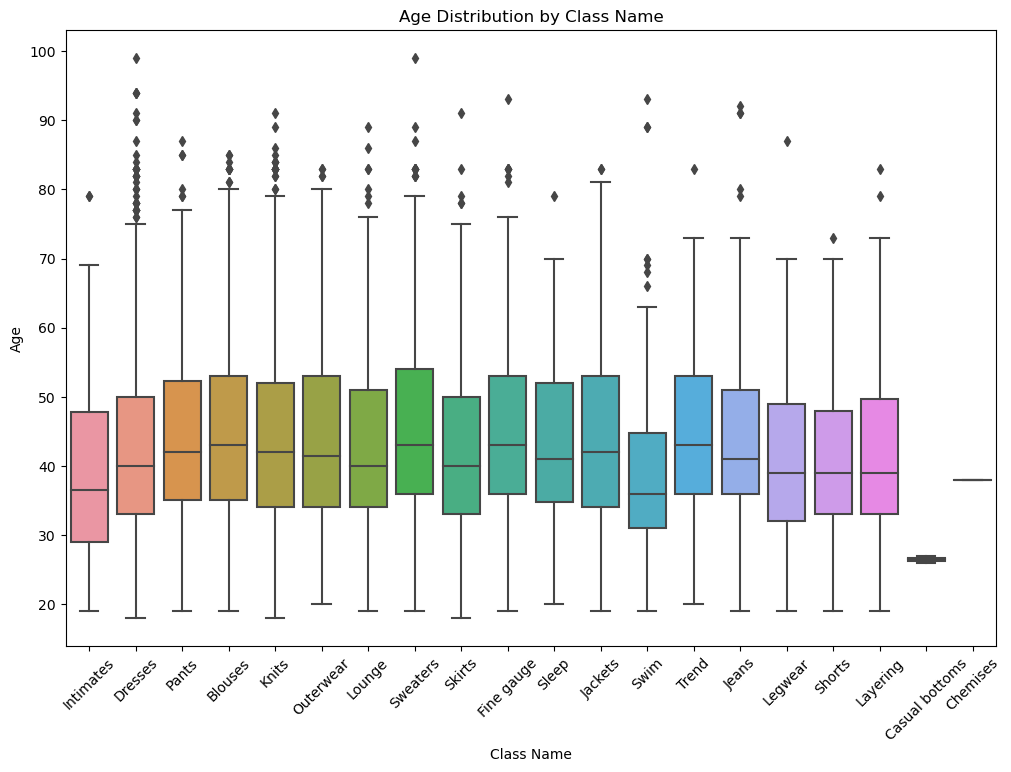

In [15]:
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a Box plot using seaborn
sns.boxplot(x='Class Name', y='Age', data=age_df)

# Add title and labels to the plot
plt.title('Age Distribution by Class Name')
plt.xlabel('Class Name')
plt.ylabel('Age')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()

### Conclusion of customers analysis:<a type=anchor name='4-con'>
    
[Go to top](#cat)

In bar chart titled "Age Distribution in 5-Year Intervals," the largest number of customers fall within the age group of 35 to 39.

According to pureto chart titled "Age Distribution and Cumulative Percentage," customers aged 25 to 54 account for 80% of the total customer base.

Based on the box plot titled 'Age Distribution by Class Name,' in the classes contain 1000+ sales,  categories of fine gauge, blouses, and sweater have higher median age, while categories of dresses and skirts have lower median age.

Therefore, the company should __focus on promoting products to customers aged 25 to 54 to maximize profit.__ Additionally, they should __target a younger demographic if they aim to promote dresses and skirts and target a older demographic if they aim to promote blouses, sweaters, and fine gauge.__

## 5. Product Analysis<a type=anchor name='product'>

[Go to top](#cat)
    
- Clothing items with 300 or more sales
- Clothing items with 150 or more 5-star rating count
- Five-star rating percentage of clothing items with 500 or more sales
- Conclusion of product analysis

### Clothing items with 300 or more sales<a type=anchor name='5-1'>
    
[Go to top](#cat)

In [20]:
product_df = age_df

# Group by 'Clothing ID', 'Division Name', 'Department Name', and 'Class Name' and count the occurrences
grouped_df = product_df.groupby(['Clothing ID', 'Division Name', 'Department Name', 'Class Name']).size().reset_index(name='Sales Count')

# Sort the grouped dataframe by 'Sales Count' in descending order
sort_grouped_df = grouped_df.sort_values(by='Sales Count', ascending=False)

# Filter to get clothing items with 500 or more counts
top_count_df = sort_grouped_df[sort_grouped_df['Sales Count'] >= 300]

# Reset index to start from 1
top_count_df.reset_index(drop=True, inplace=True)
top_count_df.index = top_count_df.index + 1

# Display the dataframe
top_count_df

,Clothing ID,Division Name,Department Name,Class Name,Sales Count
1,1078,General,Dresses,Dresses,628
2,862,General,Tops,Knits,487
3,1094,General,Dresses,Dresses,457
4,1078,General Petite,Dresses,Dresses,396
5,1081,General Petite,Dresses,Dresses,387
6,868,General,Tops,Knits,385
7,872,General,Tops,Knits,357
8,862,General Petite,Tops,Knits,319
9,1110,General,Dresses,Dresses,318
10,829,General,Tops,Blouses,314


### Clothing items with 150 or more 5-star rating count<a type=anchor name='5-2'>
    
[Go to top](#cat)

In [21]:
# Filter 5-star rating clothing items
five_star_df = product_df[product_df["Rating"] == 5]

# Group by 'Clothing ID' and count the occurrences
grouped_df = five_star_df.groupby(['Clothing ID', 'Division Name', 'Department Name', 'Class Name']).size().reset_index(name='5-star Rating Count')

# Sort the grouped dataframe by '5-star Rating Count' in descending order
sort_grouped_df = grouped_df.sort_values(by='5-star Rating Count', ascending=False)

# Filter to get clothing items with 500 or more counts of 5-star Rating
top_rating_df = sort_grouped_df[sort_grouped_df['5-star Rating Count'] >= 150]

# Reset index to start from 1
top_rating_df.reset_index(drop=True, inplace=True)
top_rating_df.index = top_rating_df.index + 1

# Display the dataframe
top_rating_df

,Clothing ID,Division Name,Department Name,Class Name,5-star Rating Count
1,1078,General,Dresses,Dresses,363
2,862,General,Tops,Knits,266
3,1094,General,Dresses,Dresses,255
4,1081,General Petite,Dresses,Dresses,235
5,872,General,Tops,Knits,219
6,1078,General Petite,Dresses,Dresses,199
7,862,General Petite,Tops,Knits,196
8,1110,General,Dresses,Dresses,189
9,829,General,Tops,Blouses,175
10,868,General,Tops,Knits,173


### Five-star rating percentage of clothing items with 500 or more sales<a type=anchor name='5-3'>
    
[Go to top](#cat)

In [22]:
# Merge the two dataframes on 'Clothing ID' and other relevant columns
merged_df = pd.merge(top_count_df, top_rating_df, on=['Clothing ID', 'Division Name', 'Department Name', 'Class Name'], how='inner')

# Calculate the ratio of 5-star Rating Count to Sales Count
merged_df['5-star Rating Ratio'] = round(merged_df['5-star Rating Count'] / merged_df['Sales Count']*100, 2)

# Sort '5-star Rating Ratio' by descending
merged_df = merged_df.sort_values(by='5-star Rating Ratio', ascending=False)

# Display the result
merged_df

,Clothing ID,Division Name,Department Name,Class Name,Sales Count,5-star Rating Count,5-star Rating Ratio
7,862,General Petite,Tops,Knits,319,196,61.44
6,872,General,Tops,Knits,357,219,61.34
4,1081,General Petite,Dresses,Dresses,387,235,60.72
8,1110,General,Dresses,Dresses,318,189,59.43
0,1078,General,Dresses,Dresses,628,363,57.80
2,1094,General,Dresses,Dresses,457,255,55.80
9,829,General,Tops,Blouses,314,175,55.73
1,862,General,Tops,Knits,487,266,54.62
3,1078,General Petite,Dresses,Dresses,396,199,50.25
5,868,General,Tops,Knits,385,173,44.94


### Conclusion of product analysis:<a type=anchor name='5-con'>
    
[Go to top](#cat)


Several clothing items have higher total sales, and the 5-star rating percentage for each item is in the range of 50% to 61%. Consequently, these products not only **have higher sales** but also **maintain a stable 5-star rating conversion.**

**The quality of the product with Clothing ID 868 should be double-checked** because its 5-star rating conversion rate is 44.94%, which is slightly lower than that of other products.

## 6. Reviewing Text Analysis<a type=anchor name='text'>
    
[Go to top](#cat)
    
- Text data preprocessing
- Frequent words in rating 1 and 5
- Sentiment analysis
- Conclusion of reviewing text analysis

### Text data preprocessing<a type=anchor name='6-1'>
    
[Go to top](#cat)

In [19]:
# Download nltk data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/homerliu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/homerliu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/homerliu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /Users/homerliu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
text_df = product_df

# Initialize
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Clean text function
def clean_text(text):
    if isinstance(text, float):
        text = ''
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stop words
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatize words
    return ' '.join(words)

# Ensure all reviews are strings
text_df['Review Text'] = text_df['Review Text'].astype(str)

# Apply the clean_text function to the 'Review Text' column
text_df['Cleaned Review Text'] = text_df['Review Text'].apply(clean_text)

# Display the dataframe with the cleaned text
text_df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Age Group,Cleaned Review Text
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,30-34,absolutely wonderful silky sexy comfortable
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,30-34,love dress sooo pretty happened find store im ...
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,60-64,high hope dress really wanted work initially o...
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,50-54,love love love jumpsuit fun flirty fabulous ev...
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,45-49,shirt flattering due adjustable front tie perf...


### Frequent words in five-star rating<a type=anchor name='6-2'>
    
[Go to top](#cat)

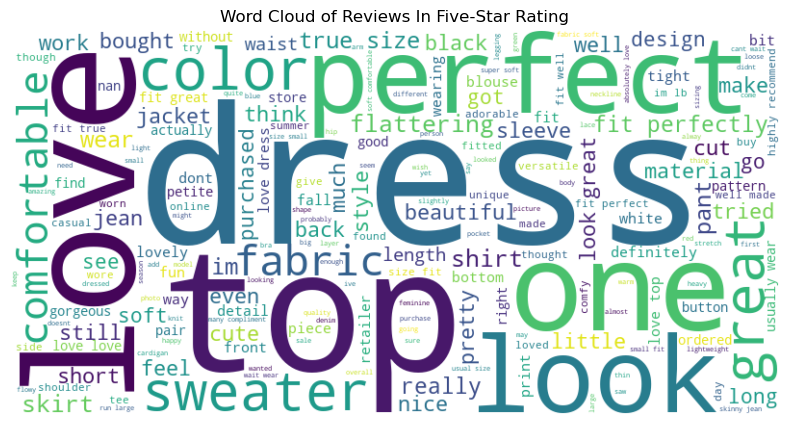

- Most common nouns: [('dress', 5183), ('size', 5117), ('color', 3991), ('fit', 3136), ('love', 3010), ('look', 2423), ('im', 2233), ('length', 1372), ('sweater', 1229), ('retailer', 1155)]

- Most common verbs: [('love', 2359), ('flattering', 1889), ('bought', 1875), ('ordered', 1644), ('got', 1490), ('go', 1073), ('make', 1019), ('look', 1003), ('run', 986), ('wear', 940)]

- Most common adjectives: [('great', 4070), ('top', 3279), ('small', 2262), ('fit', 2247), ('soft', 2221), ('comfortable', 2114), ('perfect', 1984), ('wear', 1865), ('little', 1780), ('nice', 1445)]


In [24]:
# Filter reviews with rating 5
df_filtered_5_star = text_df[text_df['Rating'].isin([5])]

# Combine all text from the 'Cleaned Review Text' column into a single string
text_5_star  = ' '.join(df_filtered_5_star['Cleaned Review Text'].astype(str))

# Create and configure the word cloud
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    max_words=200, 
    stopwords=STOPWORDS
).generate(text_5_star)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews In Five-Star Rating')
plt.show()

# Tokenize and POS tag the filtered reviews
all_words = []
for text in df_filtered_5_star['Cleaned Review Text']:
    tokens = word_tokenize(text)
    all_words.extend(tokens)

pos_tags = pos_tag(all_words)

# Extract nouns, verbs, and adjectives
nouns = [word for word, pos in pos_tags if pos.startswith('NN')]
verbs = [word for word, pos in pos_tags if pos.startswith('VB')]
adjectives = [word for word, pos in pos_tags if pos.startswith('JJ')]

# Calculate frequency distribution
nouns_freq = FreqDist(nouns)
verbs_freq = FreqDist(verbs)
adjectives_freq = FreqDist(adjectives)

# Display the most common nouns, verbs, and adjectives
print("- Most common nouns:", nouns_freq.most_common(10))
print()
print("- Most common verbs:", verbs_freq.most_common(10))
print()
print("- Most common adjectives:", adjectives_freq.most_common(10))

### Frequent words in one-star rating<a type=anchor name='6-3'>
    
[Go to top](#cat)

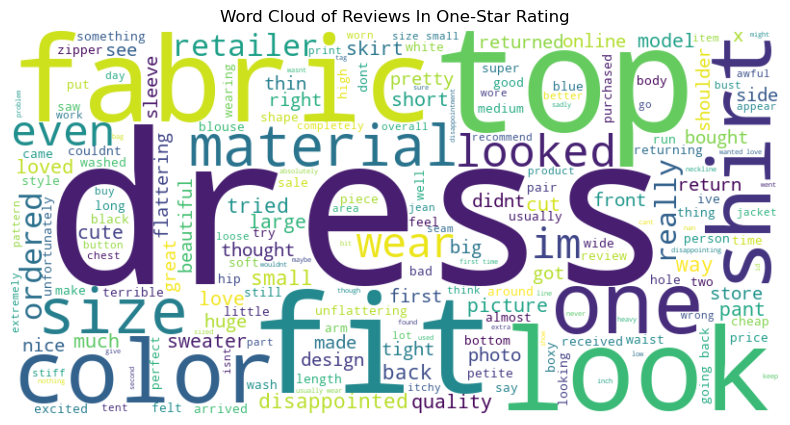

- Most common nouns: [('dress', 336), ('look', 220), ('size', 220), ('color', 165), ('fabric', 135), ('material', 125), ('shirt', 124), ('way', 119), ('fit', 118), ('retailer', 116)]

- Most common verbs: [('ordered', 140), ('looked', 124), ('made', 105), ('look', 87), ('loved', 72), ('going', 70), ('returned', 66), ('tried', 65), ('bought', 63), ('get', 56)]

- Most common adjectives: [('top', 211), ('small', 163), ('fabric', 108), ('fit', 94), ('large', 85), ('short', 83), ('thin', 82), ('much', 82), ('great', 82), ('huge', 69)]


In [25]:
# Filter reviews with rating 1
df_filtered_1_star = text_df[text_df['Rating'].isin([1])]

# Combine all text from the 'Cleaned Review Text' column into a single string
text_1_star  = ' '.join(df_filtered_1_star['Cleaned Review Text'].astype(str))

# Create and configure the word cloud
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    max_words=200, 
    stopwords=STOPWORDS
).generate(text_1_star)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews In One-Star Rating')
plt.show()

# Tokenize and POS tag the filtered reviews
all_words = []
for text in df_filtered_1_star['Cleaned Review Text']:
    tokens = word_tokenize(text)
    all_words.extend(tokens)

pos_tags = pos_tag(all_words)

# Extract nouns, verbs, and adjectives
nouns = [word for word, pos in pos_tags if pos.startswith('NN')]
verbs = [word for word, pos in pos_tags if pos.startswith('VB')]
adjectives = [word for word, pos in pos_tags if pos.startswith('JJ')]

# Calculate frequency distribution
nouns_freq = FreqDist(nouns)
verbs_freq = FreqDist(verbs)
adjectives_freq = FreqDist(adjectives)

# Display the most common nouns, verbs, and adjectives
print("- Most common nouns:", nouns_freq.most_common(10))
print()
print("- Most common verbs:", verbs_freq.most_common(10))
print()
print("- Most common adjectives:", adjectives_freq.most_common(10))

### Sentiment Analysis<a type=anchor name='6-4'>
- Step 1: Compute sentiment scores of every reviewing text
- Step 2: Create box plot to detect outlier
- Step 3: Sentiment score by age group without outlier
    
[Go to top](#cat)

#### Step 1: Compute sentiment scores of every reviewing text

In [26]:
# Download the VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/homerliu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [30]:
sentiment_df = text_df

# Initialization
sid = SentimentIntensityAnalyzer()

# Function to compute sentiment scores
def get_sentiment_score(text):
    sentiment_scores = sid.polarity_scores(text)
    return sentiment_scores['compound']

# Apply the function to each row in the DataFrame
sentiment_df['Sentiment Score'] = sentiment_df['Cleaned Review Text'].apply(get_sentiment_score)

# Display the new DataFrame with sentiment scores
sentiment_df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Age Group,Cleaned Review Text,Sentiment Score
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,30-34,absolutely wonderful silky sexy comfortable,0.8991
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,30-34,love dress sooo pretty happened find store im ...,0.9710
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,60-64,high hope dress really wanted work initially o...,0.9081
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,50-54,love love love jumpsuit fun flirty fabulous ev...,0.9437
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,45-49,shirt flattering due adjustable front tie perf...,0.9062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,30-34,happy snag dress great price easy slip flatter...,0.8979
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,45-49,reminds maternity clothes soft stretchy shiny ...,0.7579
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,30-34,fit well top see never would worked im glad ab...,0.9100
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,25-29,bought dress wedding summer cute unfortunately...,0.8807


#### Step 2: Create box chart to detect outlier

/Users/homerliu/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


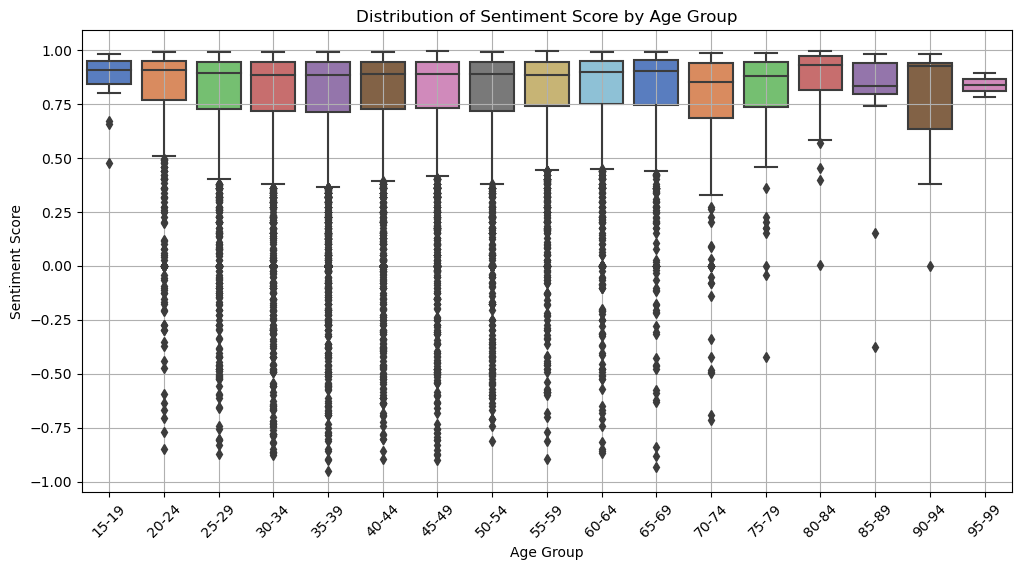

In [31]:
# Create the box plot
plt.figure(figsize=(12, 6))

# Seaborn violin plot
sns.boxplot(x='Age Group', y='Sentiment Score', data=sentiment_df, palette='muted')

# Add chart title and labels
plt.title('Distribution of Sentiment Score by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Sentiment Score')

# Rotate x-axis labels if needed for better readability
plt.xticks(rotation=45)

# Display the plot
plt.grid(True)  # Add grid lines for better readability
plt.show() 

#### Step 3: Sentiment score by age group without outlier

/var/folders/yb/kl11tnn56n1gmm6q28_4k7sw0000gn/T/ipykernel_29956/18376468.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_sentiment_filtered = filtered_df.groupby('Age Group')['Sentiment Score'].mean().reset_index()
/var/folders/yb/kl11tnn56n1gmm6q28_4k7sw0000gn/T/ipykernel_29956/18376468.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_sentiment_filtered = filtered_df.groupby('Age Group')['Sentiment Score'].median().reset_index()


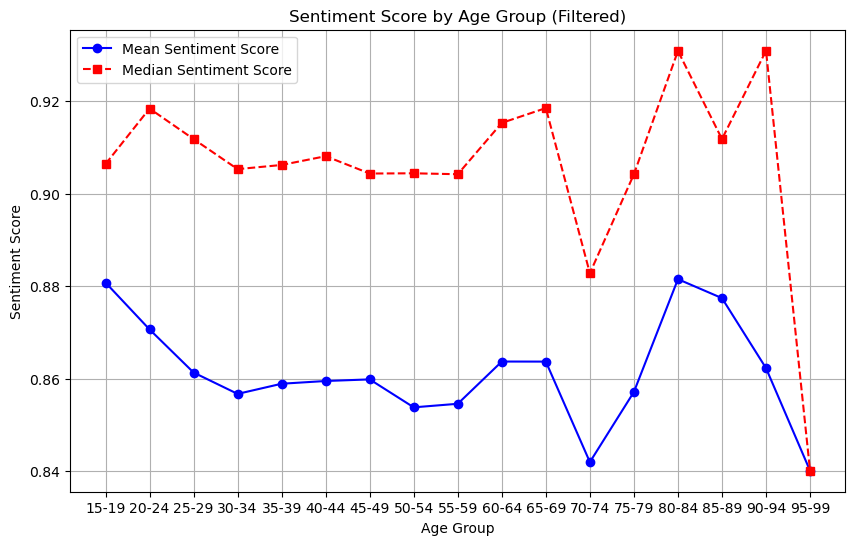

In [32]:
# Step 1: Calculate Q1 (first quartile) and Q3 (third quartile) for Sentiment Score
Q1 = sentiment_df['Sentiment Score'].quantile(0.25)
Q3 = sentiment_df['Sentiment Score'].quantile(0.75)

# Step 2: Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Step 3: Define the filtering conditions to remove outliers
# Outliers are defined as values below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to exclude outliers based on the defined bounds
filtered_df = sentiment_df[(sentiment_df['Sentiment Score'] >= lower_bound) & (sentiment_df['Sentiment Score'] <= upper_bound)]

# Step 4: Calculate the mean Sentiment Score for each Age Group using the filtered data
average_sentiment_filtered = filtered_df.groupby('Age Group')['Sentiment Score'].mean().reset_index()

# Calculate the median Sentiment Score for each Age Group using the filtered data
median_sentiment_filtered = filtered_df.groupby('Age Group')['Sentiment Score'].median().reset_index()

# Ensure Age Group is sorted in natural order for proper plotting
average_sentiment_filtered = average_sentiment_filtered.sort_values('Age Group')
median_sentiment_filtered = median_sentiment_filtered.sort_values('Age Group')

# Plot the line chart
plt.figure(figsize=(10, 6))

# Plot the mean Sentiment Score for each Age Group
plt.plot(average_sentiment_filtered['Age Group'], average_sentiment_filtered['Sentiment Score'], 
         marker='o', linestyle='-', color='b', label='Mean Sentiment Score')

# Plot the median Sentiment Score for each Age Group
plt.plot(median_sentiment_filtered['Age Group'], median_sentiment_filtered['Sentiment Score'], 
         marker='s', linestyle='--', color='r', label='Median Sentiment Score')

# Add chart title and axis labels
plt.title('Sentiment Score by Age Group (Filtered)')
plt.xlabel('Age Group')
plt.ylabel('Sentiment Score')

# Add a legend to differentiate between the mean and median lines
plt.legend()

# Show grid lines for better readability
plt.grid(True)

# Display the plot
plt.show()

### Conclusion of reviewing text analysis<a type=anchor name='6-con'>
    
[Go to top](#cat)

**Frequent words of five-star rating:**

Based on the analysis of common nouns, **the size and color of products**, along with **the quality of service provided by retailers**, are critical factors for customers when assigning a 5-star rating. Additionally, **dresses and sweaters** are frequently mentioned items in review texts.

Furthermore, the analysis of common adjectives indicates that **the texture of clothing items**, described as soft and comfortable, significantly influences customer satisfaction.

---
**Frequent words of one-star rating:**

Based on the analysis of common nouns, **the size, color, and material of products**, along with **the quality of service provided by retailers**, are critical factors for customers when assigning a 1-star rating. Additionally, **dresses and shirts** are frequently mentioned items in review texts.

Furthermore, the analysis of common adjectives indicates that **the unfitted size of clothing items**, described as small, large, short, and huge, significantly influences customer satisfaction.

---
**Sentiment analysis:**

According to box chart titled 'Distribution of Sentiment Score by Age Group', we could tell **there are many outlier in different age group.** Therefore, I filtered the data in Step 3.

In line chart titled 'Sentiment Score by Age Group (Filtered)', the sentiment scores for the main customers are stable, ranging between 0.85 and 0.87. Additionally, **the age group of 25-29 has higher mean and median sentiment scores** compared to other age groups within the primary customer base.
- *Review of customer analysis: The primary customers are in the age groups of 25 to 54 years old.*

---
**Summary:**

Therefore, **meeting and aligning customers' expectations for size, color, and material in clothing items** is a crucial factor for achieving higher ratings. Additionally, **maintaining high service quality from retailers** is equally important.

## 7. Predict Model of Recommendation<a type=anchor name='model'>
    
[Go to top](#cat)
    
- Seperate and split the data
- Prediction model building
- Implementing SMOTE for oversampling
- Implementing Random Under-Sampling
- Conclusion of prediction model of recommendation

### Seperate and split the data<a type=anchor name='7-1'>
    
[Go to top](#cat)

In [34]:
model_df = sentiment_df

# Separate features and target variable
X = model_df[['Age Group', 'Rating', 'Positive Feedback Count', 'Division Name', 'Department Name', 'Class Name', 'Sentiment Score']]
y = model_df['Recommended IND']

# Perform label encoding
label_encoder = LabelEncoder()
X['Age Group'] = label_encoder.fit_transform(X['Age Group'])
X['Division Name'] = label_encoder.fit_transform(X['Division Name'])
X['Department Name'] = label_encoder.fit_transform(X['Department Name'])
X['Class Name'] = label_encoder.fit_transform(X['Class Name'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/var/folders/yb/kl11tnn56n1gmm6q28_4k7sw0000gn/T/ipykernel_29956/1127015940.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age Group'] = label_encoder.fit_transform(X['Age Group'])
/var/folders/yb/kl11tnn56n1gmm6q28_4k7sw0000gn/T/ipykernel_29956/1127015940.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Division Name'] = label_encoder.fit_transform(X['Division Name'])
/var/folders/yb/kl11tnn56n1gmm6q28_4k7sw0000gn/T/ipykernel_29956/1127015940.py:11: SettingWithCopyWarning: 
A value is trying

### Prediction model building<a type=anchor name='7-2'>
    
[Go to top](#cat)

In [35]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build individual models
bayes = GaussianNB()
logreg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(probability=True)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
nn = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)

# Build ensemble model
ensemble_model = VotingClassifier(estimators=[
    ('bayes', bayes),
    ('logreg', logreg),
    ('knn', knn),
    ('svm', svm),
    ('xgb', xgb),
    ('nn', nn)
], voting='soft')

# Train ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions
y_pred = ensemble_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {round(accuracy, 2)}')
print(f'Classification Report:\n{report}')

Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       851
           1       0.97      0.94      0.96      3847

    accuracy                           0.93      4698
   macro avg       0.87      0.91      0.89      4698
weighted avg       0.94      0.93      0.93      4698



### Implementing SMOTE for oversampling<a type=anchor name='7-3'>
    
[Go to top](#cat)

In [36]:
# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train the ensemble model with the resampled data
ensemble_model.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = ensemble_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {round(accuracy, 2)}')
print(f'Classification Report:\n{report}')

Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.95      0.83       851
           1       0.99      0.93      0.96      3847

    accuracy                           0.93      4698
   macro avg       0.87      0.94      0.90      4698
weighted avg       0.94      0.93      0.93      4698



### Implementing Random Under-Sampling<a type=anchor name='7-4'>
    
[Go to top](#cat)

In [40]:
# Apply RandomUnderSampler for undersampling the majority class
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Train the ensemble model with the resampled data
ensemble_model.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = ensemble_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {round(accuracy, 2)}')
print(f'Classification Report:\n{report}')

Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.95      0.83       851
           1       0.99      0.93      0.96      3847

    accuracy                           0.93      4698
   macro avg       0.86      0.94      0.89      4698
weighted avg       0.94      0.93      0.93      4698



### Conclusion of prediction model of recommendation:<a type=anchor name='7-con'>
    
[Go to top](#cat)

**Model Performance**

In developing our prediction model, the classification report reveals a strong performance, with an overall accuracy of 0.93. The model achieved F1-scores of 0.82 and 0.96 for the two respective classes, indicating robust predictive capabilities in determining whether a customer would recommend the product. These metrics highlight the model's ability to handle the task effectively.

Additionally, when we analyzed the confusion matrix results for both the oversampling (using SMOTE) and undersampling (using RandomUnderSampler) techniques, we observed that the accuracy and F1-scores remained comparable to those of the original model. This consistency suggests that our initial model was well-calibrated and proficiently managed the class imbalance without requiring significant adjustments from these sampling methods.


**Business Value**

By utilizing this prediction model, the company can offer **tailored product suggestions** to customers, thereby enhancing the shopping experience by recommending products they have not yet purchased but are likely to be interested in. This approach not only supports customer engagement but also drives potential sales through personalized marketing strategies.


**Next Steps**

Despite the model's impressive performance, the 'Recommended IND' data exhibits a notable class imbalance, with a greater number of positive recommendations (1) compared to non-recommendations (0). To further improve the model's accuracy, particularly in predicting instances of non-recommendation, it is advisable for the company to **gather additional data on customers who did not recommend the product**. This enriched dataset would provide a more balanced representation, potentially enhancing the model's ability to predict customer recommendations more accurately.
